# Parsing & POS application 

```
Plan : 
  1. Parts of Speech (POS) Tagging
  2. Shallow Parsing or Chunking
  3. Constituency Parsing
  4. Dependency Parsing
  5. Application of POS (Named Entity Recognition)
```

## 1. Parts of Speech (POS) Tagging


1. Use Spacy and NLTK and compare the results 


**More details in next lab**

In [1]:
import nltk
from nltk import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /home/ivan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ivan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/ivan/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [2]:
sentence = word_tokenize("allow us to add lines in list of allow actions")
nltk.pos_tag(sentence)

[('allow', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('add', 'VB'),
 ('lines', 'NNS'),
 ('in', 'IN'),
 ('list', 'NN'),
 ('of', 'IN'),
 ('allow', 'JJ'),
 ('actions', 'NNS')]

### 1.1 Try it yourself

Using Python libraries, download Wikipedia's page on topic of your choice and tag the text parts of speech.

You can use wikipedia api to retrieve the wikipedia page : [`pip install Wikipedia-API`](https://pypi.org/project/Wikipedia-API/)

In [3]:
!pip install Wikipedia-API

In [4]:
import nltk
import spacy
from nltk import word_tokenize
import wikipediaapi
from wikipediaapi import Wikipedia

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

nlp = spacy.load("en_core_web_sm")
wiki = Wikipedia(language='en', extract_format=wikipediaapi.ExtractFormat.WIKI)

# Get the wikipedia page for "Artificial Intelligence"
page = wiki.page("Artificial_intelligence")
text = page.text

# Tokenize the text using NLTK
tokens = word_tokenize(text)

# Use NLTK to tag the parts of speech
nltk_tags = nltk.pos_tag(tokens)

# Use Spacy to tag the parts of speech
spacy_doc = nlp(text)
spacy_tags = [(token.text, token.pos_) for token in spacy_doc]

# Compare the results
print("NLTK Tagging:")
print(nltk_tags[:10])
print("\nSpacy Tagging:")
print(spacy_tags[:10])


[nltk_data] Downloading package punkt to /home/ivan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ivan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/ivan/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


NLTK Tagging:
[('Artificial', 'JJ'), ('intelligence', 'NN'), ('(', '('), ('AI', 'NNP'), (')', ')'), ('is', 'VBZ'), ('intelligence—perceiving', 'VBG'), (',', ','), ('synthesizing', 'VBG'), (',', ',')]

Spacy Tagging:
[('Artificial', 'ADJ'), ('intelligence', 'NOUN'), ('(', 'PUNCT'), ('AI', 'PROPN'), (')', 'PUNCT'), ('is', 'AUX'), ('intelligence', 'NOUN'), ('—', 'PUNCT'), ('perceiving', 'VERB'), (',', 'PUNCT')]


## 2. Shallow Parsing or Chunking

A process of extracting phrases from unstructured text. Chunking groups adjacent tokens into phrases on the basis of their POS tags. There are some standard well-known chunks such as noun phrases, verb phrases, and prepositional phrases.

There are five major categories of phrases : **Noun phrase (NP), Adjective phrase (ADJP), Verb phrase (VP), Prepositional phrase (PP), Adverb phrase (ADVP)**

In [5]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to /home/ivan/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [6]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1])

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


## 3. Constituency Parsing

Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. A constituency parser can be built based on such grammars/rules. The grammer has to be defined. 

One of the popular Constituency Parsing implementation is from stanford. A **probabilistic context-free grammar parser**

**TODO: Implement an example** <br>
Parser can be downloaded here : `https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip`

Online tutorial : 

In [7]:
# Download and unzip the parser
#!wget https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip
#!unzip stanford-parser-4.2.0.zip

In [8]:
import nltk, os
from nltk.parse.stanford import StanfordParser

os.environ['CLASSPATH'] = 'stanford-parser-full-2020-11-17/*'

scp = StanfordParser('stanford-parser-full-2020-11-17/stanford-parser.jar','stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')

sentence = "Innopolis University is a university located in the city of Innopolis."

result = list(scp.raw_parse(sentence))
print(result[0])

/tmp/ipykernel_22137/2960899494.py:6: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  scp = StanfordParser('stanford-parser-full-2020-11-17/stanford-parser.jar','stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')


(ROOT
  (S
    (NP (NNP Innopolis) (NNP University))
    (VP
      (VBZ is)
      (NP
        (NP (DT a) (NN university))
        (VP
          (VBN located)
          (PP
            (IN in)
            (NP
              (NP (DT the) (NN city))
              (PP (IN of) (NP (NNP Innopolis))))))))
    (. .)))


In [9]:
## To display in colab
# !apt-get install -y xvfb # Install X Virtual Frame Buffer

# os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
# os.environ['DISPLAY']=':1.0'  

# !apt install ghostscript python3-tk

For the tags meanings [see](https://web.archive.org/web/20130517134339/http://bulba.sdsu.edu/jeanette/thesis/PennTags.html)

In [10]:
!pip install svgling

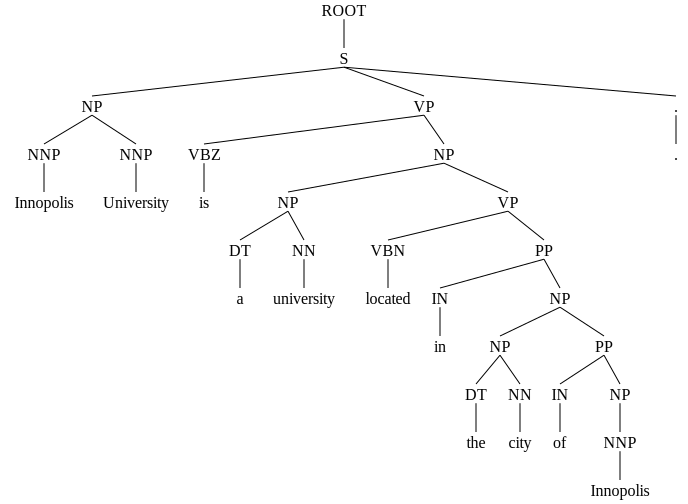

In [11]:
from IPython.display import display
display(result[0])

### 3.1 Try it on your sentence

(ROOT
  (S
    (NP (DT The) (NN sun))
    (VP
      (VBD was)
      (VP
        (VBG shining)
        (ADVP (RB brightly))
        (PP (IN on) (NP (DT the) (JJ clear) (JJ blue) (NN sky)))
        (, ,)
        (S
          (VP
            (VBG casting)
            (NP
              (NP (DT a) (JJ warm) (NN glow))
              (PP (IN over) (NP (DT the) (JJ bustling) (NN city))))))))
    (. .)))


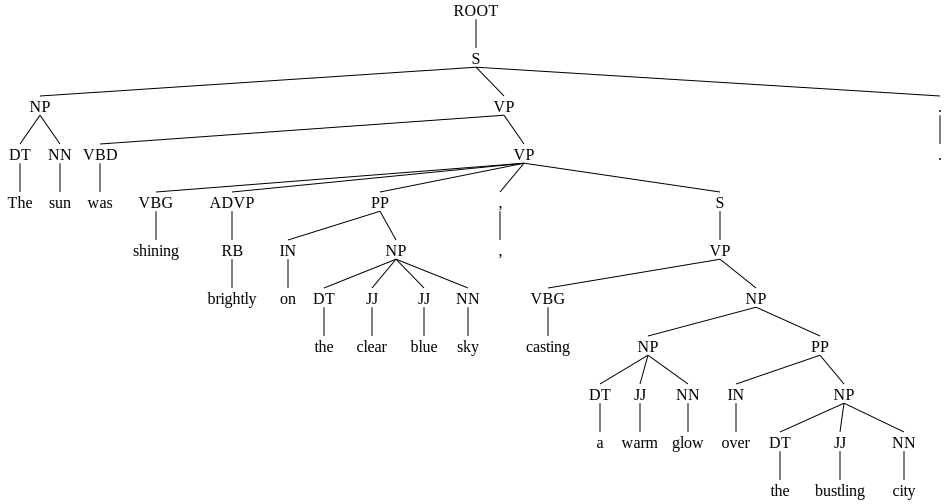

In [12]:
sentence = "The sun was shining brightly on the clear blue sky, casting a warm glow over the bustling city."

result = list(scp.raw_parse(sentence))
print(result[0])

display(result[0])

## 4. Dependency Parsing

In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence. 

![](https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png)

Dependency Parsing used in shallow parsing and named entity recognition



In [13]:
import spacy
import nltk

nlp = spacy.load("en_core_web_sm")

sentence_nlp = nlp("Innopolis University is a university located in the city of Innopolis.")

In [14]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

### 4.1 Try it on your sentence

In [15]:
sentence_nlp = nlp("US unvails world's most powerful supercomputer, beats China")

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

## 5. Named Entity Recognition

Named Entity Recognition (NER) is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on.

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /home/ivan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ivan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/ivan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/ivan/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## 5.1 Get data

In [17]:
sentence = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'


## Preprocess the data 

In [18]:
def preprocess(sent):
  sent = nltk.word_tokenize(sent)
  sent = nltk.pos_tag(sent)
  return sent

sent = preprocess(sentence)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

## Define pattern to parse the data

In [19]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


## Parse data and visualize

In [20]:
NPChunker = nltk.RegexpParser(pattern) 
result = NPChunker.parse(sent)

In [21]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


## NER with spacy

SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus 

In [22]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

## Get data

**en_core_web_sm** : English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer

In [23]:
nlp = en_core_web_sm.load()
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


In [24]:
doc.text

'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

## TASK

1. Using Python libraries, download Wikipedia's page on topic of your choice and apply NER (using NLTK and spacy). 
1. Compare the results and visualize one paragraph with with entities assigned to words (you can try spacy visualization tool [`displacy`](https://spacy.io/usage/visualizers)) 

In [25]:
import wikipediaapi
from wikipediaapi import Wikipedia

wiki = Wikipedia(language='en', extract_format=wikipediaapi.ExtractFormat.WIKI)

# Get the wikipedia page for "Artificial Intelligence"
page = wiki.page('Machine Learning')
text = page.text

In [26]:
from spacy import displacy

displacy.render(nlp(text[:2000]), style='ent', jupyter=True)


In [30]:
# Using NER from NLTK
import nltk
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk import word_tokenize, pos_tag

nltk_tags = pos_tag(word_tokenize(text))
nltk_chunks = nltk.ne_chunk(nltk_tags)
nltk_ners = tree2conlltags(nltk_chunks)
pprint(nltk_ners)

[('Machine', 'NN', 'B-GPE'),
 ('learning', 'NN', 'O'),
 ('(', '(', 'O'),
 ('ML', 'NNP', 'O'),
 (')', ')', 'O'),
 ('is', 'VBZ', 'O'),
 ('a', 'DT', 'O'),
 ('field', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('inquiry', 'NN', 'O'),
 ('devoted', 'VBN', 'O'),
 ('to', 'TO', 'O'),
 ('understanding', 'JJ', 'O'),
 ('and', 'CC', 'O'),
 ('building', 'NN', 'O'),
 ('methods', 'NNS', 'O'),
 ('that', 'IN', 'O'),
 ('``', '``', 'O'),
 ('learn', 'VB', 'O'),
 ("''", "''", 'O'),
 ('–', 'NN', 'O'),
 ('that', 'WDT', 'O'),
 ('is', 'VBZ', 'O'),
 (',', ',', 'O'),
 ('methods', 'NNS', 'O'),
 ('that', 'IN', 'O'),
 ('leverage', 'NN', 'O'),
 ('data', 'NNS', 'O'),
 ('to', 'TO', 'O'),
 ('improve', 'VB', 'O'),
 ('performance', 'NN', 'O'),
 ('on', 'IN', 'O'),
 ('some', 'DT', 'O'),
 ('set', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('tasks', 'NNS', 'O'),
 ('.', '.', 'O'),
 ('It', 'PRP', 'O'),
 ('is', 'VBZ', 'O'),
 ('seen', 'VBN', 'O'),
 ('as', 'IN', 'O'),
 ('a', 'DT', 'O'),
 ('part', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('artificial', 'JJ', 

In [31]:
# Using NER from spacy
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
spacy_entities = [(ent.text, ent.label_) for ent in doc.ents]

print("spacy NER:")
pprint(spacy_entities)

spacy NER:
[('ML', 'ORG'),
 ('every morning', 'TIME'),
 ('the last 10,000 days', 'DATE'),
 ('tomorrow', 'DATE'),
 ('morning', 'TIME'),
 ('one', 'CARDINAL'),
 ('MNIST', 'ORG'),
 ('1959', 'DATE'),
 ('Arthur Samuel', 'PERSON'),
 ('IBM', 'ORG'),
 ('the early 1960s', 'DATE'),
 ('CyberTron', 'ORG'),
 ('Raytheon Company', 'ORG'),
 ('the 1960s', 'DATE'),
 ('Nilsson', 'ORG'),
 ('Learning Machines', 'ORG'),
 ('the 1970s', 'DATE'),
 ('Duda', 'PERSON'),
 ('1973', 'DATE'),
 ('1981', 'DATE'),
 ('40', 'CARDINAL'),
 ('26', 'CARDINAL'),
 ('10', 'CARDINAL'),
 ('4', 'CARDINAL'),
 ('Tom M. Mitchell', 'PERSON'),
 ("Alan Turing's", 'PERSON'),
 ('"Computing Machinery and Intelligence"', 'WORK_OF_ART'),
 ('two', 'CARDINAL'),
 ('the early days', 'DATE'),
 ('AI', 'GPE'),
 ('488', 'CARDINAL'),
 ('AI', 'ORG'),
 ('1980', 'DATE'),
 ('AI', 'ORG'),
 ('AI', 'GPE'),
 ('AI', 'GPE'),
 ('708–710', 'CARDINAL'),
 ('AI', 'ORG'),
 ('the AI/CS', 'ORG'),
 ('Hopfield', 'PERSON'),
 ('Rumelhart', 'PERSON'),
 ('Hinton', 'GPE'),
 ('